HOW ARE IN DEMAND SKILLS TRENDING FOR DATA ANALYSTS

METHODOLOGY
1.Aggregate skill counts monthly
2.Re analyze based on percentage of total jobs
3.Plot the monthly skill demand

In [2]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
df_ind=df[(df['job_country']== "India") & (df['job_title_short']== "Data Analyst") ].copy()
df_ind["job_posted_month_no"]=df_ind["job_posted_date"].dt.month
df_ind_explode=df_ind.explode("job_skills")
df_pivot=df_ind_explode.pivot_table(index="job_posted_month_no",columns="job_skills",aggfunc="size",fill_value=0)
df_pivot.loc['Total']=df_pivot.sum()

df_pivot=df_pivot[df_pivot.loc["Total"].sort_values(ascending=False).index]
df_pivot=df_pivot.drop("Total")

In [17]:
da_totals=df_ind.groupby('job_posted_month_no').size()
#now we have to div all the skill count in every month by the month's job posting
df_percent=df_pivot.div(da_totals/100,axis=0)

#to change month number to name
df_percent=df_percent.reset_index()
df_percent["job_posted_month"]=df_percent["job_posted_month_no"].apply(lambda x : pd.to_datetime(x,format='%m').strftime("%b"))
df_percent=df_percent.set_index("job_posted_month")
df_percent=df_percent.drop(columns="job_posted_month_no")

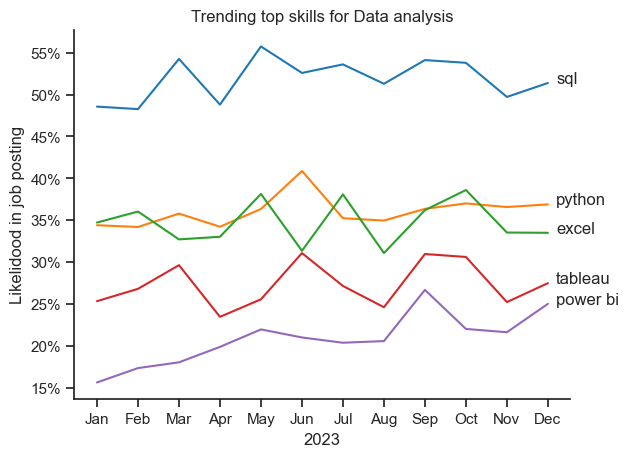

In [26]:
df_plot=df_percent.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,palette ="tab10")
sns.set_theme(style="ticks")
plt.title('Trending top skills for Data analysis')
plt.xlabel("2023")
plt.ylabel('Likelidood in job posting')
plt.legend().remove()
sns.despine()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])